Problem Defination :The customer first applies for aloan and after that, the company validates the customer eligibility for the loan.This dataset contains the details of the person willing to apply for loan , based on the details collected, we need to predict whether to sanction the loan or not.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the dataset we can see that the 'Target' variable is 'Loan_Status'.
Loan status has two values: Yes(Y) or NO(N)

Yes: if the loan is approved

NO: if the loan is not approved
Hence , we can see that it is a "Binary Classification Problem"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Display the top 5 rows by default
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Display the bottom 5 rows by default
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#To get the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#To get the number of rows and columns of our dataset
df.shape

(614, 13)

The dataset consists of 614 rows and 13 columns

In [7]:
#To check for datatypes of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

--From the above observation we can see that the datatypes are of 3 different types:
    Object: represnts categorical variables (Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status)
    
--int64: represents only Integer variables(ApplicantIncome)
        
--float64: represents the variables that have numeric decimal values(CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History)
    

In [8]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
#To check for Null(NaN) or missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above  result we cann see that there are many null values to handle, this can be done in different ways:
    * For categorical columns , we use 'mode'to fill thee values
    * For continous decimal value column , we use 'mean/median' of that specific column and replace it
    * Lastly drop the null values only if null values are very high in number(more than 50%)

In [10]:
#Handle the null values for float datatype
np.mean(df['LoanAmount'])

146.41216216216216

In [11]:
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))

In [12]:
np.mean(df['Loan_Amount_Term'])

342.0

In [13]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

In [14]:
np.mean(df['Credit_History'])

0.8421985815602837

In [15]:
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

In [16]:
#Handle null values for categorical columns
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [17]:
df['Gender'].fillna('Male',inplace=True)

In [18]:
df['Gender'].isnull().sum()

0

In [19]:
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [20]:
df['Married'].fillna('Yes',inplace=True)

In [21]:
df['Married'].isnull().sum()

0

In [22]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [23]:
df['Dependents'].fillna('0',inplace=True)

In [24]:
df['Dependents'].isnull().sum()

0

In [25]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [26]:
df['Self_Employed'].fillna('No',inplace=True)

In [27]:
df['Self_Employed'].isnull().sum()

0

In [28]:
#Now, finally lets check for the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From the above result we can see that there are no null values present

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Types of variables:
Categorical features: these have categories and do not have any order(Gender,Married,Self_Employed,Credit_History,Loan_Status)
    
Numeric features: these features have numeric values (ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term)
    
Ordinal features:these are categorical in nature and have some Order(Dependents,Education,Property_Area)

# Data Visualization

Male      502
Female    112
Name: Gender, dtype: int64


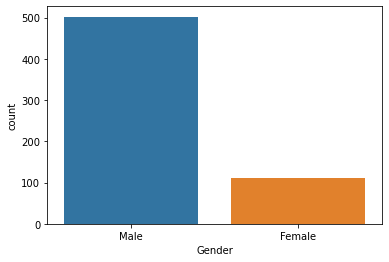

In [30]:
#Univariate Analysis
import seaborn as sns
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

From the above observation we can see that the total count for 'Male' is 502 and 'Female' is 112 , whose loan has been approved

Yes    401
No     213
Name: Married, dtype: int64


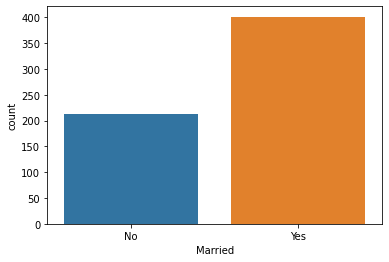

In [31]:
ax=sns.countplot(x='Married',data=df)
print(df['Married'].value_counts())

From the observation we can see that the 'Married' count is 401 , whereas 'Unmarried' is 213, which also shows that they have more age when compared to unmarried

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


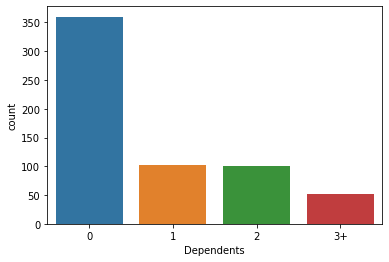

In [32]:
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

From the above observation we can see that maximum people are with no dependents :360 , and the minimum with '3+' dependents are:51 

In [33]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


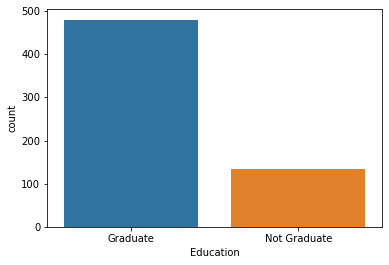

In [34]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

From the above observation we can see that count of 'Graduate' is 480 and 'Not Graduate' is 134 , which we can know that maximum people have the basic eductaion required to understand the loan policy

No     532
Yes     82
Name: Self_Employed, dtype: int64


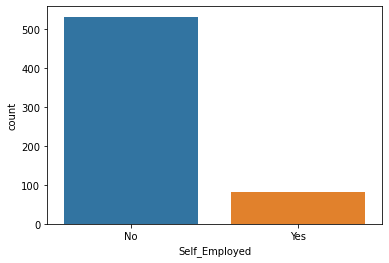

In [35]:
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'].value_counts())

From the above observation we can see that maximum people are into some kind of service i,e not 'Self_Employed' are : 532 and 'Self_Employed' are too less in count:82

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


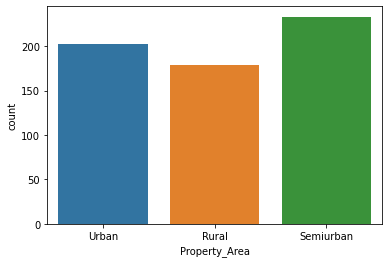

In [36]:
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'].value_counts())

From the above observations we can see that the properyt the person holds is high in 'Semiurban' area:233, in 'Rural' area it is least:179, this also shows that people have some land('Property_Area') in either of the places 

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


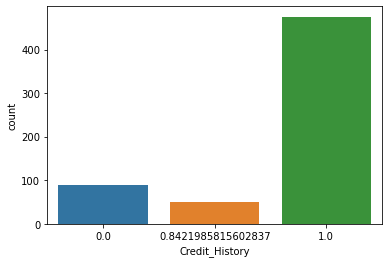

In [37]:
ax=sns.countplot(x='Credit_History',data=df)
print(df['Credit_History'].value_counts())

From The above observations we can see that maximum people have the credit history of count:475

Y    422
N    192
Name: Loan_Status, dtype: int64


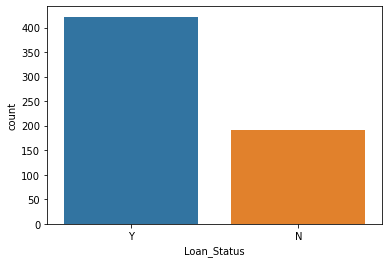

In [38]:
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'].value_counts())

From the above observations we can see that the "target" variable 'Loan_Status' has the maximum count of: 422, which shows that more than 60% of the dataset has been approved for loan , and hence further we need to balance the data using various data balancing techniques if required 

From the above bar plots observations we can see that :
    * Around 75% of applicants are Male
    * Around 65% of applicants are Married
    * Around 15% of applicants are Self Employed
    * Maximum of the applicants dont have any dependents
    * Around 80% of applicants are Graduate
    * Most of the applicants are from SemiUrban area

# EDA

We shall use Scatter plot to find the relationship with the target variable


In [31]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


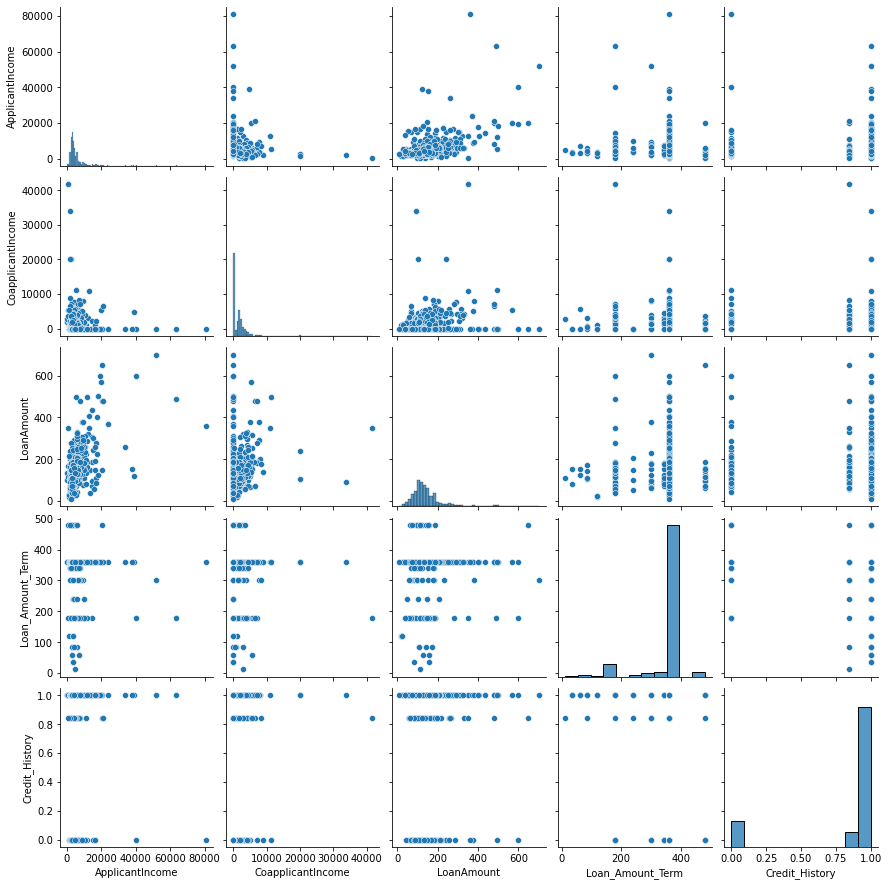

In [32]:
import seaborn as sns
sns.pairplot(df)

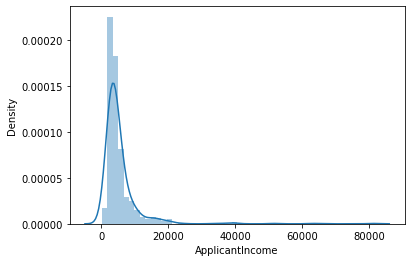

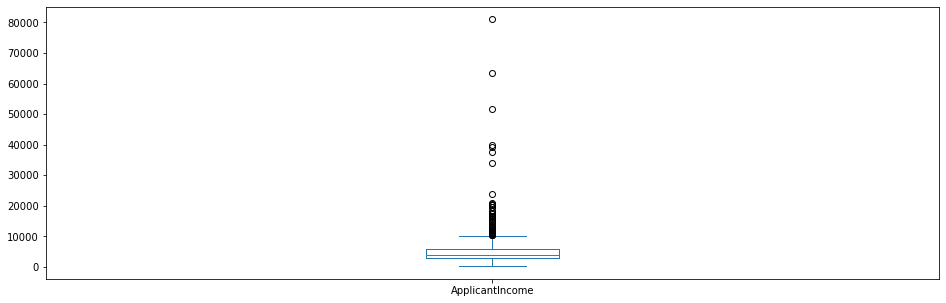

In [41]:
#Check the Numerical datatypes visualization:
import matplotlib.pyplot as plt
sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

From the above observations we can see that 'ApplicantIncome' distribution is towards Left and hence not normally distributed. Also we can see that there are a lot of Outliers present

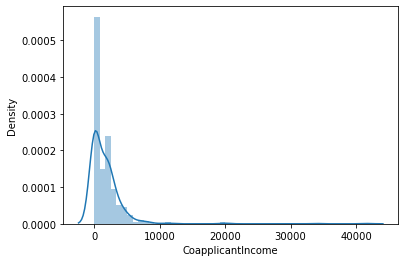

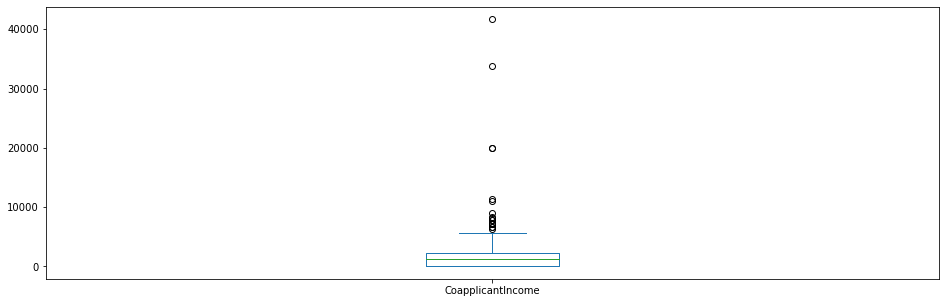

In [42]:
#Co-applicant income distribution:
sns.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The similar distribution can be seen in the CoapplicantIncome as well, the data us highly distributed towards left and not normally distributed and also lot of outliers are present

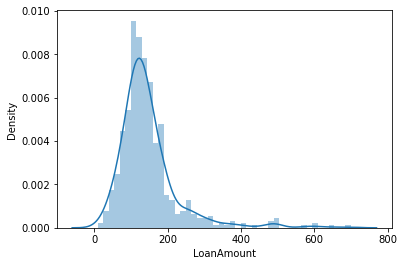

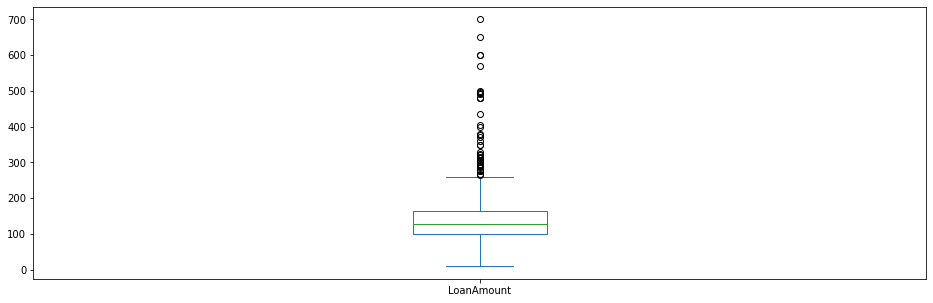

In [43]:
#distribution of target variable
sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

From the above observations we can see that lot of outliers are present and the distribution is fairly normal

# Bivariate analysis

#Some of the observations that can be made:
--Applicants who have high income have higher chances for loan approval
--Applicants who do not have any history of previous loans or those who have cleared their previous loans should have high chances for loan approval
--If the loan amount is less, then the approval is faster and positive
--Lesser the amount to be paid monthly, higher the chances for loan approval

In [33]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


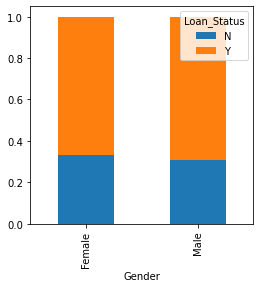

In [51]:
#Categorical Variables with target variable
G=pd.crosstab(df['Gender'],df['Loan_Status'])
G.div(G.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

From the above observations it can be seen that the proportion of male and female applicants are more or less same for approved and unapproved loans

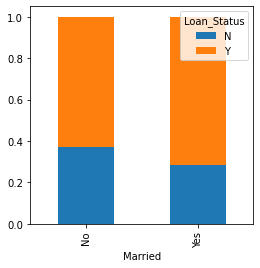

In [52]:
Ma=pd.crosstab(df['Married'],df['Loan_Status'])
Ma.div(Ma.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


From the above observation we can see that the proportion of Married applicant is higher for loan approval

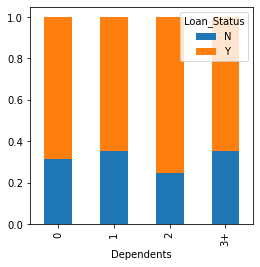

In [54]:
D=pd.crosstab(df['Dependents'],df['Loan_Status'])
D.div(D.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

From the above observation we can see that the no of dependents with 1 or 3+  have almost similar distribution for loan approval

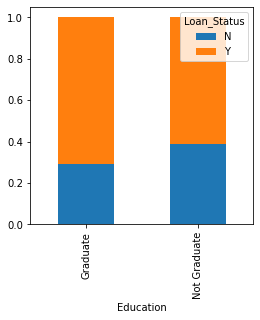

In [56]:
Edu=pd.crosstab(df['Education'],df['Loan_Status'])
Edu.div(Edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

From the above observation we can see that, applicants who are Graduate have bit higher chances for loan approval

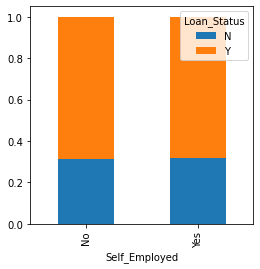

In [55]:
SE=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
SE.div(SE.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

From the above observations we can see that distribution for loan approval with employment does not have much impact

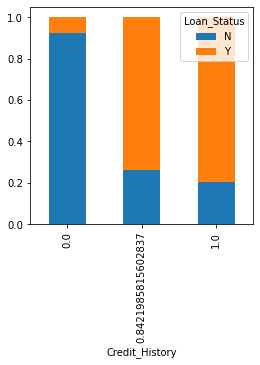

In [57]:
CH=pd.crosstab(df['Credit_History'],df['Loan_Status'])
CH.div(CH.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()



From the above observation we can  see that the applicants with credit history of '1' are more likely to get loans approved, and those with '0', do not have much chances for loan approval

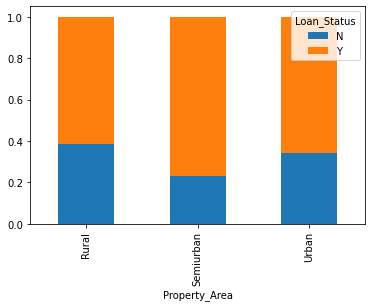

In [59]:
PA=pd.crosstab(df['Property_Area'],df['Loan_Status'])
PA.div(PA.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

From the above observations we can see that the applicants with 'Semiurban' property_area have more chances for loan approval than compared to 'Rural' and 'Semiurban'

In [ ]:
---We shall convert 3+ to 3 in the 'Dependents' categories, to make it a numeric variable
---We shall now convert the target variable’s into 0 and 1 so that we can find its correlation
with numerical variables. 
---One more reason to do so is few models like logistic regression takes only numeric values as input
---We shall replace N with '0' and Y with '1'
 

In [35]:
df['Dependents'].replace('3+',3,inplace=True)

df['Loan_Status'].replace('N',0,inplace=True)

df['Loan_Status'].replace('Y',1,inplace=True)


In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [37]:
#Now convert 'Dependents' column form object type to int type
df["Dependents"]=df["Dependents"].astype(int)
df.Dependents.dtype

dtype('int32')

# Correlation 

<AxesSubplot:>

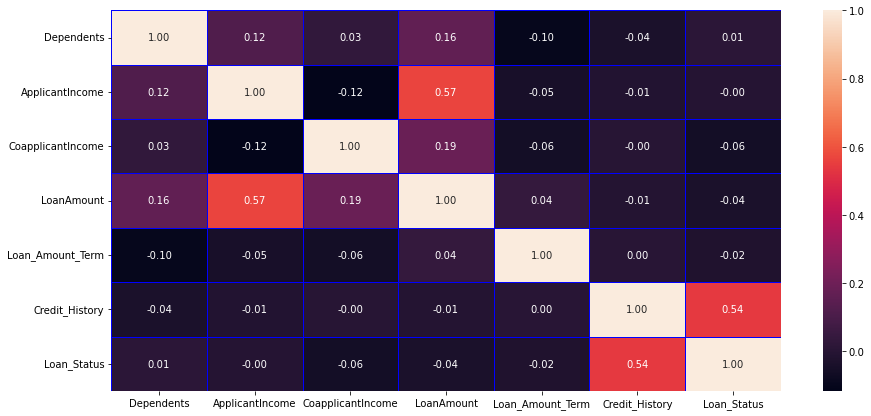

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Blue",fmt='.2f')

From the above observations we can see that the most positively corelated with the target column is "Credit_History" which is 54 percent , and has a strong bond. Also, "ApplicantIncome" and "LoanAmount" shows good correlation with the target column and are negatively correlated.

# Describing datasets

In [42]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


From the above observations, if mean > median , then the data is skewed to right, therefore the columns "ApplicantIncome", "CoapplicantIncome" and "LoanAmount" the data is right skewed.
If mean < median then the data is left skewed , therefore the columns "Loan_Amount_Term","Credit_History","Loan_Status"

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 60.1+ KB


# Skewness

In [43]:
df.skew()

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

From the above observations we can see that skewness is present 
--acceptable range of skewness is : -0.65 to +0.65
--columns with high skewness are: ApplicantIncome,CoapplicantIncome,LoanAmount
--We do not remove skewness for  target column

In [44]:
df_new=df

In [45]:
df.shape

(614, 13)

In [46]:
#Encoding of DataFrame
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        

In [47]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,610.0,1.0,1.0,3,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,611.0,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,612.0,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


# Outliers Removal

--using zscore technique

In [48]:
#divide 'x' and 'y' as independent and target variables
#using z-score technique for outlier removal
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,610.0,1.0,1.0,3,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,611.0,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,612.0,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [49]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [50]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(614, 12)

In [51]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [52]:
x=x[(z<3).all(axis=1)]

In [53]:
x.shape

(577, 12)

In [54]:
df.shape

(614, 13)

In [55]:
y=y[(z<3).all(axis=1)]

In [56]:
y.shape

(577,)

In [58]:
#Percentage of dataloss:

loss_percentage=(614-577)/614*100
print(loss_percentage)

6.026058631921824


#The percentage of data loss is in scceptable range

# Transformation of data

In [59]:
#Transforming data to reduce skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [60]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [61]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# Oversampling the data

In [106]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [63]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

From the above observation we can see that after applying SMOTE, the value for '1' and '0' is 398 and 398, hence the ratio is 1:1 now

In [65]:
#Binary classification model-- since the output(target variable) has only 2 variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

--We will use the train_test_split function from sklearn to divide our train dataset.
hence let us import train_test_split.
--The dataset has been divided into training and validation part.
hence lets import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [66]:
#splitting the dataframe
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random state:",i)
        print("Training accuracy is :",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is :",accuracy_score(y_test,pred_test)*100)

At random state 94 The model performs well
At random state: 94
Training accuracy is : 71.22641509433963
Testing accuracy is : 71.25
At random state 109 The model performs well
At random state: 109
Training accuracy is : 71.85534591194968
Testing accuracy is : 71.875
At random state 168 The model performs well
At random state: 168
Training accuracy is : 70.59748427672956
Testing accuracy is : 70.625
At random state 236 The model performs well
At random state: 236
Training accuracy is : 71.22641509433963
Testing accuracy is : 71.25
At random state 253 The model performs well
At random state: 253
Training accuracy is : 71.22641509433963
Testing accuracy is : 71.25
At random state 276 The model performs well
At random state: 276
Training accuracy is : 71.22641509433963
Testing accuracy is : 71.25
At random state 357 The model performs well
At random state: 357
Training accuracy is : 69.9685534591195
Testing accuracy is : 70.0
At random state 395 The model performs well
At random state: 395

--So our predictions are almost 72% accurate, i.e. we have identified 72% of the loan status correctly.

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=109)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.48      0.43      0.45        79
           1       0.49      0.54      0.52        81

    accuracy                           0.49       160
   macro avg       0.49      0.49      0.49       160
weighted avg       0.49      0.49      0.49       160



#Cross validation score for logistic regression

--Logistic Regression using stratified k-folds cross-validation
To check how robust our model is to unseen data, we can use Validation. 
It is a technique that involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. 
Some of the common methods for validation are listed below:

-The validation set approach
-k-fold cross-validation
-Leave one out cross-validation (LOOCV)
-Stratified k-fold cross-validation

In [69]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:",j)
    print("Cross validation score is: ",lsc*100)
    print("Accuracy score is: ",lss*100)
    print("\n")

At cv: 2
Cross validation score is:  42.33668341708543
Accuracy score is:  70.625


At cv: 3
Cross validation score is:  54.15756372062231
Accuracy score is:  70.625


At cv: 4
Cross validation score is:  60.92964824120604
Accuracy score is:  70.625


At cv: 5
Cross validation score is:  66.20911949685534
Accuracy score is:  70.625


At cv: 6
Cross validation score is:  65.83504215083163
Accuracy score is:  70.625


At cv: 7
Cross validation score is:  66.209772218156
Accuracy score is:  70.625


At cv: 8
Cross validation score is:  67.21717171717172
Accuracy score is:  70.625


At cv: 9
Cross validation score is:  67.72074679378049
Accuracy score is:  70.625




In [70]:
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is :",lsscore_selected,"\n The accuracy score is :",lss)

The cv score is : 0.677207467937805 
 The accuracy score is : 0.70625


The mean validation accuracy for this model turns out to be 0.70

In [71]:
#1-------------------Random Forest Classifier----------------------
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.80625
[[61 18]
 [13 68]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        79
           1       0.79      0.84      0.81        81

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



In [74]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is: ",accuracy_score(y_test,predRFC)-score.mean())

[0.4125     0.32704403 0.72327044 0.75471698 0.46540881]
0.5365880503144654
Difference between Accuracy score and cross validation score is:  0.2696619496855346


In [72]:
#2--------------------------------------SVC--------------------------------------
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.75625
[[60 19]
 [20 61]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        79
           1       0.76      0.75      0.76        81

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



In [73]:
#Checking cv score for supportvectormachine classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is: ",accuracy_score(y_test,predsvc)-score.mean())

[0.68125    0.65408805 0.74213836 0.73584906 0.67295597]
0.6972562893081762
Difference between Accuracy score and cross validation score is:  0.0589937106918238


In [75]:
#3-------------------------Gradient Boosting Classifier---------------------------
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.80625
[[57 22]
 [ 9 72]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.79        79
           1       0.77      0.89      0.82        81

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.80       160
weighted avg       0.81      0.81      0.80       160



In [76]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is: ",accuracy_score(y_test,predGB)-score.mean())

[0.4        0.25786164 0.43396226 0.4591195  0.43396226]
0.3969811320754718
Difference between Accuracy score and cross validation score is:  0.4092688679245282


In [77]:
#4------------------------ExtraTreesClassifier-----------------------------------
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8
[[63 16]
 [16 65]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        79
           1       0.80      0.80      0.80        81

    accuracy                           0.80       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.80      0.80      0.80       160



In [78]:
#Checking cv score for Extra Tree Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is: ",accuracy_score(y_test,predET)-score.mean())

[0.675      0.68553459 0.8490566  0.89308176 0.69811321]
0.7601572327044025
Difference between Accuracy score and cross validation score is:  0.03984276729559755


In [ ]:
#Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable.
We will create the following three new features:

--Total Income — As discussed during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.
--EMI — EMI is the monthly amount to be paid by the applicant to repay the loan. The idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan.
We can calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term.
--Balance Income — This is the income left after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [ ]:
--------------Conclusion--------------
We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI.
So, feature engineering helped us in predicting our target variable.